# The correlation between the change in atmospheric CO2 concentration and global temperature
# Using Python for data manipulation and visualization

### Overview
In this project, I use Python and a few of its major libraries for data science to analyze the correlation between atmospheric CO2 concentration and global temperature. I'm interested to see how the global temperature will change when CO2 concentration is the only factor, as well as how I can create data frames of both existing data and new data and create plots out of them in Python.


### Visualize CO2 concentration from 2000-2021
First, I import **pandas** for working with data frames of data, and **matplotlib** for visualizing data.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

I download the .csv file of the Mauna Loa annual CO2 data, read it into a pandas data frame, and set the Year column to be the index. 

Then, I create a line graph of the annual CO2 mean from 2000 to 2020.

<AxesSubplot:title={'center':'Mauna Loa CO2 Annual Mean 2000-2020'}, xlabel='Years', ylabel='Annual CO2 mean (ppm)'>

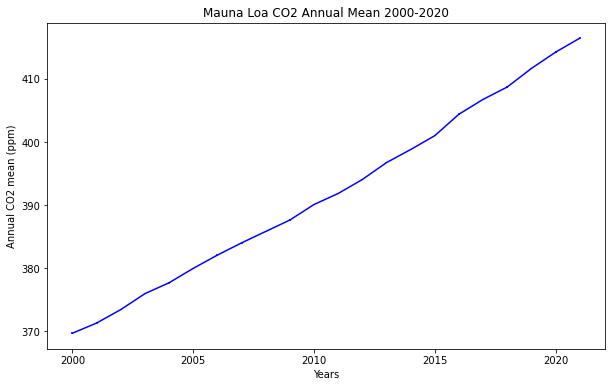

In [8]:
co2Mean = pd.read_csv("co2_annmean_mlo.csv", skiprows = range(97), engine = 'python',
                        names = ["Year", "Mean", "Uncertainty", "Growth"]) # Growth is not yet any column of data in the original csv file, but we create it
    
df_co2 = pd.DataFrame(co2Mean)
df_co2 = df_co2.set_index("Year")
df_co2["Mean"].plot(color = 'blue', yerr = df_co2.Uncertainty, xlabel = 'Years', ylabel ='Annual CO2 mean (ppm)', 
                    title = 'Mauna Loa CO2 Annual Mean 2000-2020', figsize = (10,6))
# plt.tight_layout()
# plt.show() 


### Projection of CO2 from 2022-2040
For the period with existing data 2000-2021, I calculate a year's growth rate by taking the difference between the mean annual CO2 concentration of two consecutive years, and dividing it by the CO2 amount of the former year.

For example, the mean CO2 level of year 2020 and year 2021 is 414.24 and 416.45 respectively.  
Therefore, the CO2 growth rate of year 2021 is $\frac{416.45-414.24}{414.24} = 0.005335071$ 

For 2022-2040, I make an assumption that a year's growth rate is the average of the previous three years' growth rates.  

A thing we should keep in mind when using this approach is that the growth rate will get more and more uniform through time. Looking at the growth rates in the 2000-2020 period, we see that a year's growth rate can't often be accurately predicted based on the previous years' rates. Nevertheless, I will move forward with this approach because in this project, we are not considering any other factor than the CO2 concentration when doing projection. 

I forecast the CO2 concentrations of the future years also based solely on the forecasted growth rates. 

For example, to forecast the CO2 concentration of 2022, I multiply the 2021's concentration (416.45) with the forecasted 2022's growth rate (0.006265189) plus 1.   
$416.45 * (0.006265189 + 1) = 419.0591381$ ppm


Based on this projection model, the forecasted CO2 concentration in our atmosphere in 2040 is 466.3059775869478 ppm.


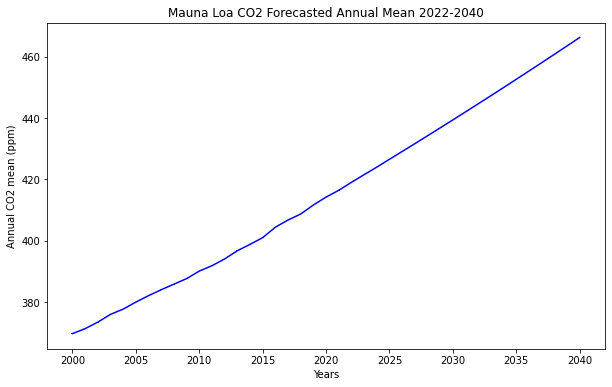

In [10]:
# Create a column of growth rate for the years with existing data (2000-2021)
for i in range(2001,2022):
     df_co2.at[i,"Growth"] = (df_co2.at[i,"Mean"] - df_co2.at[i-1,"Mean"])/df_co2.at[i-1,"Mean"]

# Create new rows for 2020-2040
for i in range(2022,2041):
     # Populate forecasted growth rates for 2020-2040
     # Each year's growth rate is the average of the previous three years' rates
     df_co2.at[i,"Growth"] = (df_co2.at[i-3,"Growth"] + df_co2.at[i-2,"Growth"] + df_co2.at[i-1,"Growth"]) / 3 


# Populate forecasted CO2 means for 2020-2040 based on the forecasted growth rates
for i in range(2022,2041):
     df_co2.at[i,"Mean"] = df_co2.at[i-1,"Mean"] * (1 + df_co2.at[i,"Growth"])

# fig, axes = plt.subplots(figsize = (16,6), ncols=2)

# Plot the Annual CO2 mean from 2000 to 2040     
df_co2["Mean"].plot(color = 'blue', yerr = df_co2.Uncertainty, xlabel = 'Years', ylabel ='Annual CO2 mean (ppm)', 
                    title = 'Mauna Loa CO2 Forecasted Annual Mean 2022-2040', figsize = (10,6))

co2_2040 = df_co2.loc[2040]["Mean"] # Extract the CO2 data of year 2040 from the data frame
print(f"Based on this projection model, the forecasted CO2 concentration in our atmosphere in 2040 is {co2_2040} ppm.")

### Project global temperature rise based on the forecasted CO2 rise

There are a lot of factors contributing to the change in global temperature, but in this model, I am only looking at the atmospheric carbon concentration. To project the rise in global temperature by 2040, I use the equation developed by the UCAR Center for Science Education in their Very Simple Climate Model simulation.

**$T = T_0 + S*log_2 (\frac{C}{C_0})$**

- $T$ is the new/current temperature
- $T_0$ is the known temperature at some reference time
- $S$ is the "climate sensitivity" factor (the temperature rise as a result of CO2 doubling)
- $C$ is the new/current atmospheric CO2 concentration
- $C_0$ is the known atmospheric CO2 concentration at some reference time (must be the same time as $T_0$)

According to the 2021 IPCC report, our climate sensitivity is very likely somewhere between 2 and 5 Celsius degrees (between 3.6 and 9 Farenheit degrees). I calculated the projected temperatures by 2040 in both scenarios to see what the results would be.

At the lowest sensitivity level of 2:

Compared to the pre-industrial era, when the atmospheric CO2 concentration was around 285 ppm, by 2040 the Earth temperature would have increased by 1.4206 Celsius degrees, fairly close to the 1.5 degree mark that the IPCC predicted in their 2021 report.

$2 * log_2 (466.31/285) = 2 * 0.7 = 1.4$ Celsius degrees

*At the highest sensitivity level of 5:*

Compared to the pre-industrial era, the Earth temperature would have increased by 3.5516 Celsius degrees by 2040, more than twice as high as the 1.5 degree mark that the IPCC predicted in their 2021 report.

$5 * log_2 (466.31/285) = 5 * 0.7 = 3.5$ Celsius degrees


---

Another CO2-temperature equation I investigate is the one found in the research paper "Linear Global Temperature Correlation to Carbon Dioxide Level, Sea Level, and Innovative Solutions to a Projected 6°C Warming by 2100.", which is said to be superior to other climate probability models (Valone, T. 2021). This equation is derived from James Hansen's CO2 projection graphs and MIT's table of data points derived from those graphs.   

$\Delta C = \Delta T × 20$

The linear relationship is predicted to be accurate until the CO2 level reaches around 500-600ppm where a divergence begins in the linear correlation.

Because our forecasted CO2 concentration by 2040 is around 466 ppm which hasn't passed the divergence limit, I attempt to use this equation to project the global temperature rise by from 2021 to 2040. It results in a rise of 2.49 Celsius degrees, a very sharp rise that surpasses most climate thresholds set by scientists. 

$\frac{466.31 - 416.45}{20} = 2.49$ Celsius degrees

I try using this equation to see how it predicts the temperature rise from the pre-industrial era till this current year 2021. The result is also a very big increase in temperature, 6.55 Celsius degrees.   
$\frac{416.45 - 285}{20} = 6.55$ Celsius degrees

I decide that the equation developed by the UCAR Center for Science Education is more reasonable for my project's purposes.

### Citation

"The Very Simple Climate Model Activity", UCAR Center for Science Education, https://scied.ucar.edu/activity/very-simple-climate-model-activity

Forster, P., T. Storelvmo, K. Armour, W. Collins, J.-L. Dufresne, D. Frame, D.J. Lunt, T. Mauritsen, M.D. Palmer, M. Watanabe, M. Wild, and H. Zhang, 2021: The Earth’s Energy Budget, Climate Feedbacks, and Climate Sensitivity. In Climate Change 2021: The Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change [Masson-Delmotte, V., P. Zhai, A. Pirani, S.L. Connors, C. Péan, S. Berger, N. Caud, Y. Chen, L. Goldfarb, M.I. Gomis, M. Huang, K. Leitzell, E. Lonnoy, J.B.R. Matthews, T.K. Maycock, T. Waterfield, O. Yelekçi, R. Yu, and B. Zhou (eds.)]. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA, pp. 923–1054, doi:10.1017/9781009157896.009.

Valone, T. (2021) Linear Global Temperature Correlation to Carbon Dioxide Level, Sea Level, and Innovative Solutions to a Projected 6°C Warming by 2100. Journal of Geoscience and Environment Protection, 9, 84-135. doi: 10.4236/gep.2021.93007.